In [1]:
!pip install sktime[all_extras]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [28]:
from sktime.datasets import load_airline
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.forecasting.theta import ThetaForecaster
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error
from sktime.forecasting.arima import ARIMA
from sktime.forecasting.trend import STLForecaster

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [4]:
# Setting config for the seaborn plots
sns.set_style("darkgrid")
pd.plotting.register_matplotlib_converters()
# Default figure size
sns.mpl.rc("figure", figsize=(16, 6))
sns.mpl.rc("font", size=14)

In [5]:
y = load_airline()

In [67]:
y.head()

Period
1949-01    112.0
1949-02    118.0
1949-03    132.0
1949-04    129.0
1949-05    121.0
Freq: M, Name: Number of airline passengers, dtype: float64

<AxesSubplot:xlabel='Period'>

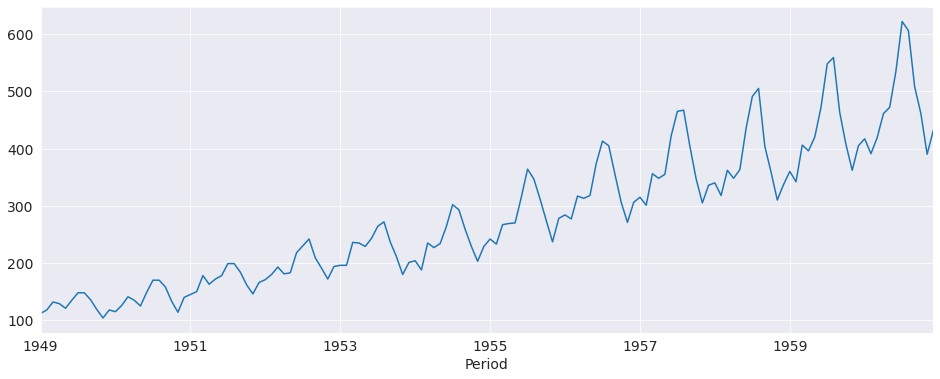

In [8]:
y.plot()

#### Time series decomposition
This allows us to decompose the time series to the trend, seasonality, and residual components of the time series. 

In [21]:
ydf = y.reset_index().set_index(pd.to_datetime(y.index.to_timestamp())).drop("Period",axis=1)

In [36]:
res = seasonal_decompose(ydf)

[]

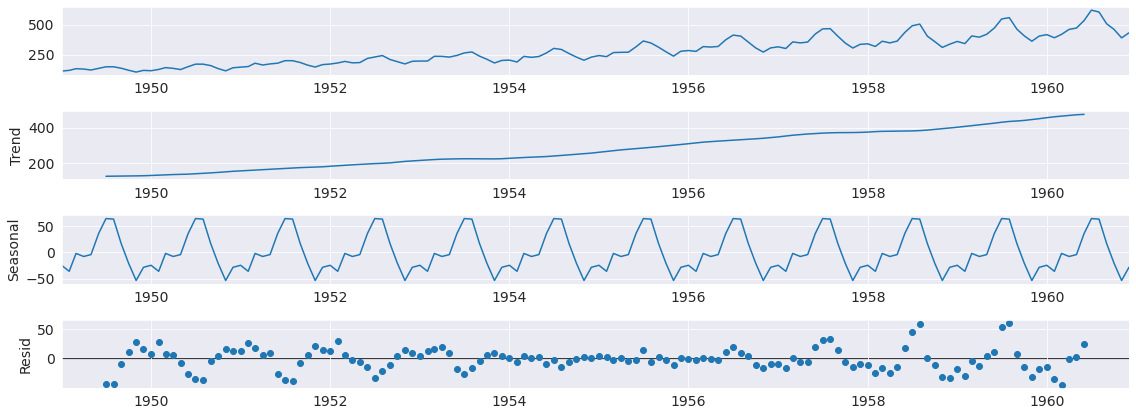

In [27]:
res.plot()
plt.plot()

#### Plotting autocorrelations
In this method we are looking at what kind off autocorrelations exist between two timesteps $ y_t $ and $ y_{t-1} $. In the plot below we can see the confidence interval as the light blue shaded area. Any autocorrelation point that sticks above this can be considered significant. In the below plot we can see the lags are highly autocorrelated with each other and that some of the lags are more significant than others. This is characteristic of the trend and seasonality present in the oiginal dataset.

[]

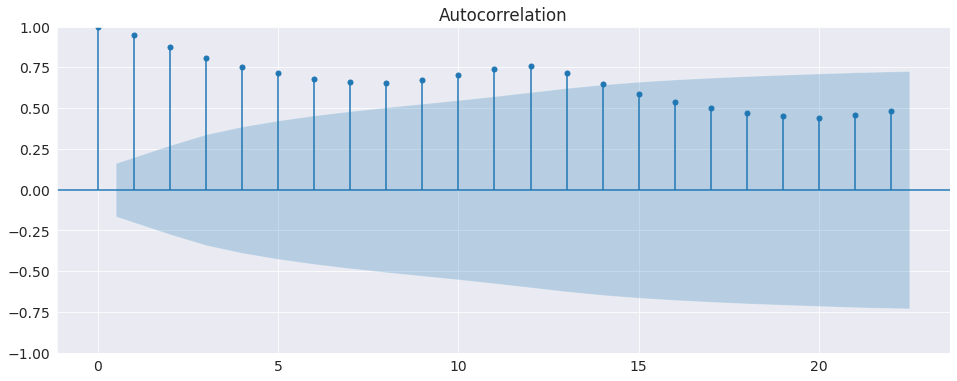

In [33]:
plot_acf(y)
plt.plot()

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


[]

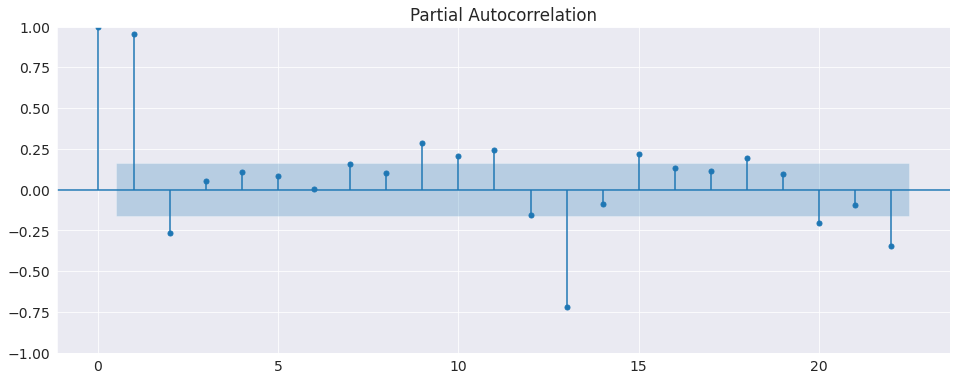

In [34]:
plot_pacf(y)
plt.plot()

In [ ]:
# y.index = pd.to_datetime(y.index.to_timestamp(),freq="M")

In [30]:
y_train, y_test = temporal_train_test_split(y)

fh = ForecastingHorizon(y_test.index, is_relative=False)

ARIMA(1,1,0) model

In [68]:


forecaster = ARIMA((1,1,0)) 

forecaster.fit(y_train)

y_pred_arima = forecaster.predict(fh)

mean_absolute_percentage_error(y_test, y_pred_arima)

0.11948742667200261

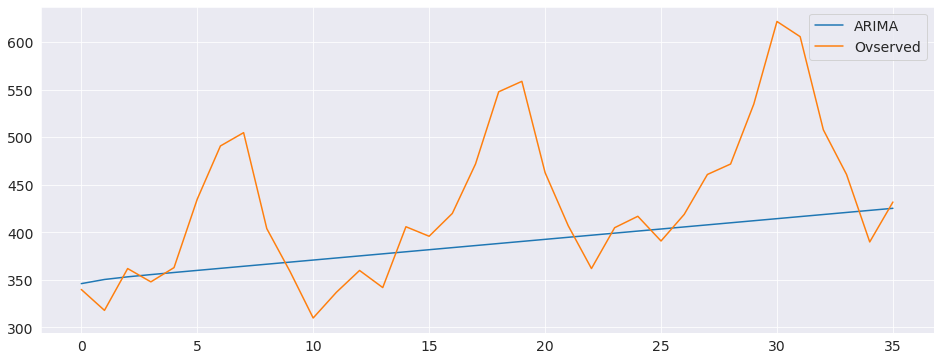

In [69]:
plt.plot(y_pred_arima.values,label="ARIMA")
plt.plot(y_test.values,label="Ovserved")
plt.legend()

Let's look at the ACF and PACF plots and see what lags are most prominent

#### ARIMA(13,1,0)

In [100]:
forecaster = ARIMA((13,1,0)) 

forecaster.fit(y_train)

y_pred_arima = forecaster.predict(fh)

mean_absolute_percentage_error(y_test, y_pred_arima)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


0.04205055432664197

#### SARIMA(3,1,0)(1,0,0)12

In [138]:
forecaster = ARIMA((3,1,0),seasonal_order=(2,1,0,12)) 

forecaster.fit(y_train)

y_pred_sarima = forecaster.predict(fh)

mean_absolute_percentage_error(y_test, y_pred_sarima)

0.045814152439993275

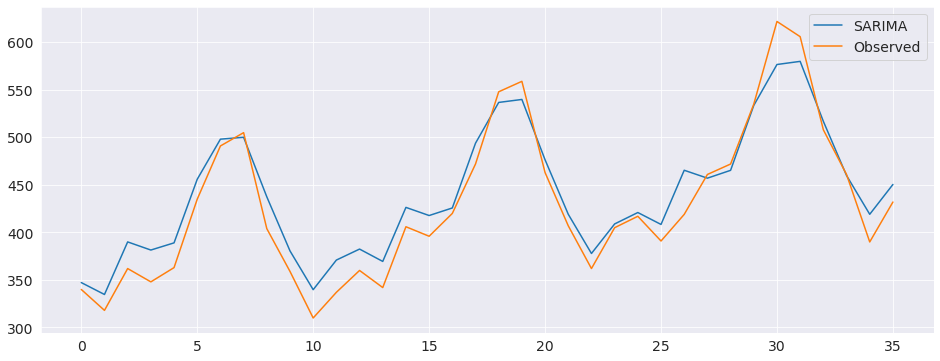

In [139]:
plt.plot(y_pred_sarima.values,label="SARIMA")
plt.plot(y_test.values,label="Observed")
plt.legend()

In [140]:
forecaster = STLForecaster(sp=12) 

forecaster.fit(y_train)

y_pred_stl = forecaster.predict(fh)

mean_absolute_percentage_error(y_test, y_pred_stl)

0.04909256114584845

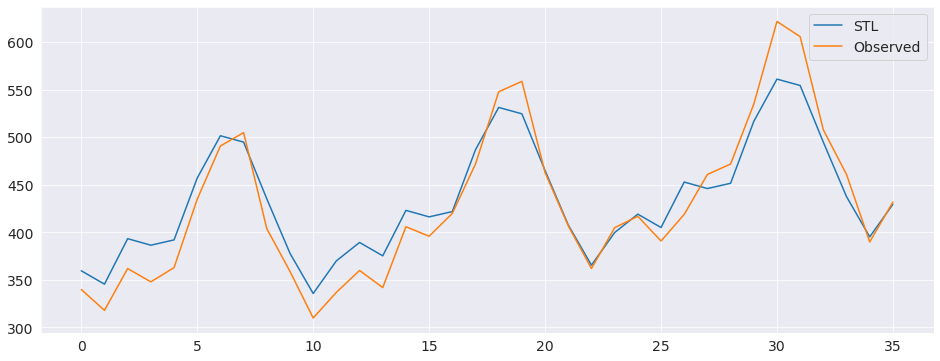

In [141]:
plt.plot(y_pred_stl.values,label="STL")
plt.plot(y_test.values,label="Observed")
plt.legend()

In [126]:
trend_forecaster = ARIMA((3,1,0))


forecaster = STLForecaster(sp=12,
                           forecaster_trend=trend_forecaster) 

forecaster.fit(y_train)


y_pred_stl = forecaster.predict(fh)

mean_absolute_percentage_error(y_test, y_pred_stl)

0.057338759003813085

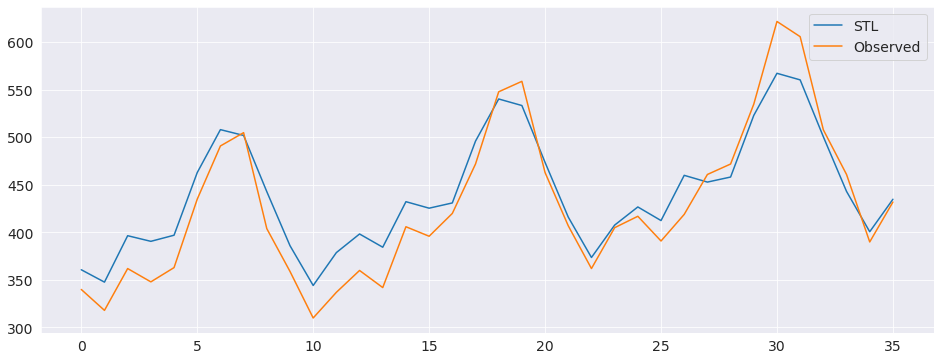

In [127]:
plt.plot(y_pred_stl.values,label="STL")
plt.plot(y_test.values,label="Observed")
plt.legend()

In [149]:
from sktime.forecasting.arima import AutoARIMA
forecaster = AutoARIMA(start_P=13,max_P=16,sp=12)

In [150]:
forecaster.fit(y_train)

y_pred = forecaster.predict(fh)

mean_absolute_percentage_error(y_test, y_pred)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966:

0.04148971434138202

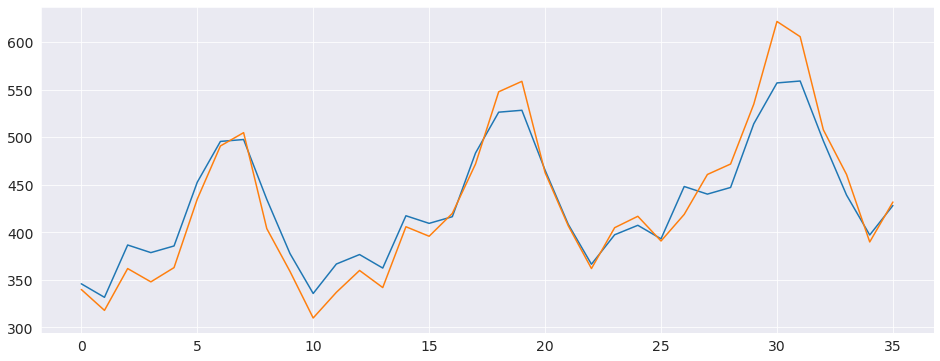

In [151]:
plt.plot(y_pred.values)
plt.plot(y_test.values)

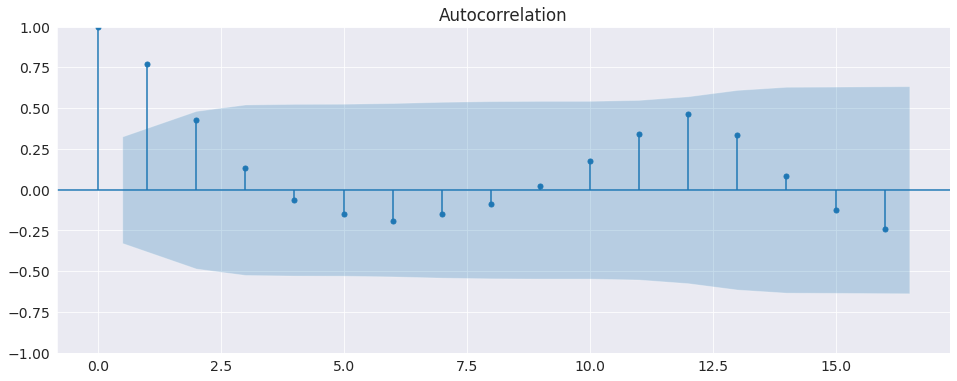

In [ ]:
plot_acf(res1)
plt.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


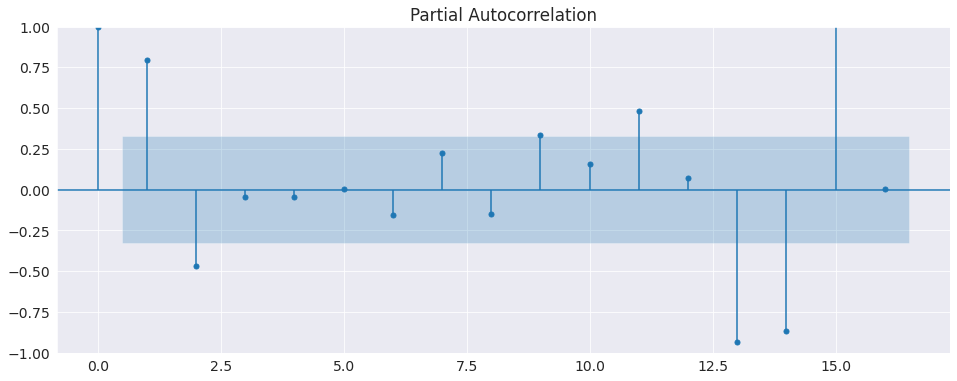

In [ ]:
plot_pacf(res1)
plt.show()

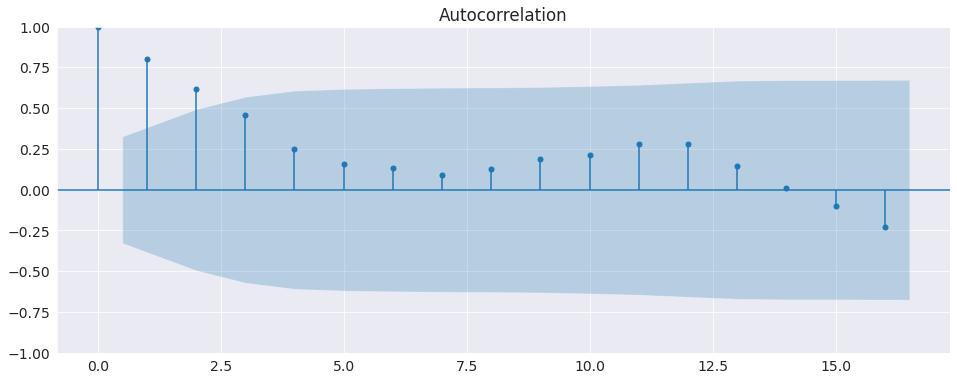

In [ ]:
plot_acf(res0)
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sktime.forecasting.compose import make_reduction

regressor = RandomForestRegressor()
model = make_reduction(regressor, window_length=15, strategy="recursive")

RecursiveTabularRegressionForecaster(estimator=RandomForestRegressor(),
                                     window_length=15)